Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              400       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Accuracy: 89.999998
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 8)              400       
                                             

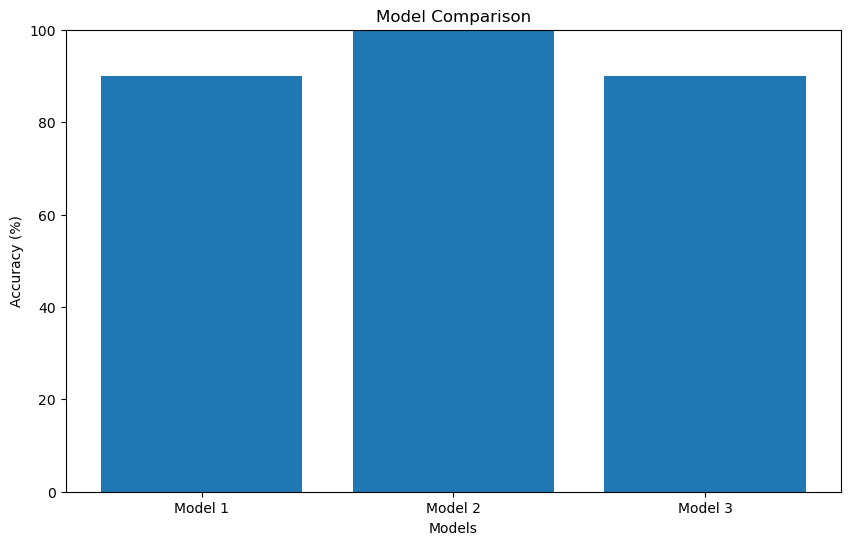

In [1]:
from numpy import array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense

# Define 10 restaurant reviews
reviews =[
          'Never coming back!',
          'horrible service',
          'rude waitress',
          'cold food',
          'horrible food!',
          'awesome',
          'awesome services!',
          'rocks',
          'poor work',
          'couldn\'t have done better'
]
#Define labels
labels = array([0,0,0,1,0,1,1,1,0,1])

def tokenize_and_pad(docs, vocab_size=50):
    tokenized_docs = [one_hot(d, vocab_size) for d in docs]
    max_len = max([len(doc) for doc in tokenized_docs])
    padded_docs = pad_sequences(tokenized_docs, maxlen=max_len, padding='post')

    return padded_docs

vocab_size = 50
X = tokenize_and_pad(reviews, vocab_size)
y = labels

# Create three different model architectures
models = []

# Lists to store accuracy for each model
accuracies = []


# Model 1
model1 = Sequential()
model1.add(Embedding(vocab_size, 8, input_length=X.shape[-1]))
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model1.summary())

model1.fit(X, y, epochs=20, verbose=0)

loss, accuracy = model1.evaluate(X, y, verbose=0)
print('Accuracy: %f' % (accuracy*100))

models.append(model1)
accuracies.append(accuracy * 100)

#Model 2
model2 = Sequential()
model2.add(Embedding(vocab_size, 8, input_length=X.shape[-1]))
model2.add(Flatten())
model2.add(Dense(2, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model2.summary())

model2.fit(X, y, epochs=20, verbose=0)

loss, accuracy = model2.evaluate(X, y, verbose=0)
print('Accuracy: %f' % (accuracy*100))

models.append(model2)
accuracies.append(accuracy * 100)

# Model 3
model3 = Sequential()
model3.add(Embedding(vocab_size, 8, input_length=X.shape[-1]))
model3.add(Flatten())
model3.add(Dense(4, activation='relu'))
model3.add(Dense(2, activation='softmax'))

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model3.summary())

model3.fit(X, y, epochs=20, verbose=0)

loss, accuracy = model3.evaluate(X, y, verbose=0)
print('Accuracy: %f' % (accuracy*100))

models.append(model3)
accuracies.append(accuracy * 100)

# Plot the accuracies
plt.figure(figsize=(10, 6))
models_names = ["Model 1", "Model 2", "Model 3"]
plt.bar(models_names, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison")
plt.ylim(0, 100)
plt.show()
